# 1. Pokedex WebScraping + Data Cleaning + EDA

- A Special thank you to Ryan Luu, https://github.com/ryanluuwas/Bulbapedia-Web-Scraper

## 1.1 Webscrape Data Collection (Beautiful Soup)

    - The data collected represent all known species of pokemon from generations 1 - 8.

    - Each Generation introduces alterations to some pokemon including changes in primary and  secondary type,and the Health - BST ( Base Stat ) values. 

    - The Data Collected does not represent those changes, but will show often show duplicates for those pokemon that fall into this category.

    - The Data Collected was from the root url https://bulbapedia.bulbagarden.net/ followed by the pageurl "wiki/List_of_Pokémon_by_National_Pokédex_number" and then the respective pokemon url.

    Feature Extraction
 
    - The Features extracted were:
        - Pokedex # :  Dex No.
        - Pokemon Name : Name
        - Generation Represented : Generation
        - Pokemon Primary Type : Primary Type
        - Pokemon Secondary Type : Secondary Type
        - Hit Points : Health
        - Pokemon Attack Stat : Attack
        - Pokemon Defense Stat : Defense
        - Pokemon Special Attack Stat Sp. Attack
        - Pokemon Special Defense Stat: Sp. Defense
        - Pokemon Speed Stat : Speed
        - Pokemon Base Stat ( total of all stats ) : BST
        
 



## 1.2 Import libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [29]:
pokedex = pd.read_csv('/Users/jtc/Desktop/hello_ds/bulbapedia_data.csv')

## 1.3 DataFrame Cleaning and Aggregation
**Checking for Null vals, NAN , Duplicates**

In [30]:
pokedex

,Dex No.,Name,Generation,Primary Type,Secondary Type,Health,Attack,Defense,Sp. Attack,Sp. Defense,Speed,BST
0,#001,Bulbasaur,Generation I,Grass,Poison,45,49,49,65,65,45,318
1,#002,Ivysaur,Generation I,Grass,Poison,60,62,63,80,80,60,405
2,#003,Venusaur,Generation I,Grass,Poison,80,82,83,100,100,80,525
3,#004,Charmander,Generation I,Fire,Unknown,39,52,43,60,50,65,309
4,#005,Charmeleon,Generation I,Fire,Unknown,58,64,58,80,65,80,405
5,#006,Charizard,Generation I,Fire,Flying,78,84,78,109,85,100,534
6,#007,Squirtle,Generation I,Water,Unknown,44,48,65,50,64,43,314
7,#008,Wartortle,Generation I,Water,Unknown,59,63,80,65,80,58,405
8,#009,Blastoise,Generation I,Water,Unknown,79,83,100,85,105,78,530
9,#010,Caterpie,Generation I,Bug,Unknown,45,30,35,20,20,45,195


In [31]:
pokedex.shape

(958, 12)

### 1.3.1 Replacing NaN Values.

When the data was scraped it appears that Generation 8 pokemon did not recieve thier proper labels.

In [32]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dex No.         958 non-null    object
 1   Name            958 non-null    object
 2   Generation      876 non-null    object
 3   Primary Type    958 non-null    object
 4   Secondary Type  958 non-null    object
 5   Health          958 non-null    int64 
 6   Attack          958 non-null    int64 
 7   Defense         958 non-null    int64 
 8   Sp. Attack      958 non-null    int64 
 9   Sp. Defense     958 non-null    int64 
 10  Speed           958 non-null    int64 
 11  BST             958 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 89.9+ KB


In [33]:
pokedex['Generation'].fillna('Generation VIII', inplace = True)

In [34]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dex No.         958 non-null    object
 1   Name            958 non-null    object
 2   Generation      958 non-null    object
 3   Primary Type    958 non-null    object
 4   Secondary Type  958 non-null    object
 5   Health          958 non-null    int64 
 6   Attack          958 non-null    int64 
 7   Defense         958 non-null    int64 
 8   Sp. Attack      958 non-null    int64 
 9   Sp. Defense     958 non-null    int64 
 10  Speed           958 non-null    int64 
 11  BST             958 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 89.9+ KB


### 1.3.2 Removing Duplicate Rows 

It appears that some rows are duplicated, this is do to some pokemon having multiple forms.


In [35]:
cleaned_pokedex = pokedex.drop_duplicates()

In [36]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(cleaned_pokedex)

    Dex No.          Name         Generation Primary Type Secondary Type  \
0      #001     Bulbasaur       Generation I        Grass         Poison   
1      #002       Ivysaur       Generation I        Grass         Poison   
2      #003      Venusaur       Generation I        Grass         Poison   
3      #004    Charmander       Generation I         Fire        Unknown   
4      #005    Charmeleon       Generation I         Fire        Unknown   
5      #006     Charizard       Generation I         Fire         Flying   
6      #007      Squirtle       Generation I        Water        Unknown   
7      #008     Wartortle       Generation I        Water        Unknown   
8      #009     Blastoise       Generation I        Water        Unknown   
9      #010      Caterpie       Generation I          Bug        Unknown   
10     #011       Metapod       Generation I          Bug        Unknown   
11     #012    Butterfree       Generation I          Bug         Flying   
12     #013 

### 1.3.3 Replacing Column values

It appears that the column Generation begins showing "On Smogon Pokédex" at 722-809. I will remove that and replace with "Generation VII"

In [37]:
cleaned_pokedex['Generation'] = cleaned_pokedex['Generation'].replace(['On Smogon Pokédex'],'Generation VII')

<ipython-input-37-c7a7feae8fe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_pokedex['Generation'] = cleaned_pokedex['Generation'].replace(['On Smogon Pokédex'],'Generation VII')


In [38]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(cleaned_pokedex)

    Dex No.          Name       Generation Primary Type Secondary Type  \
0      #001     Bulbasaur     Generation I        Grass         Poison   
1      #002       Ivysaur     Generation I        Grass         Poison   
2      #003      Venusaur     Generation I        Grass         Poison   
3      #004    Charmander     Generation I         Fire        Unknown   
4      #005    Charmeleon     Generation I         Fire        Unknown   
5      #006     Charizard     Generation I         Fire         Flying   
6      #007      Squirtle     Generation I        Water        Unknown   
7      #008     Wartortle     Generation I        Water        Unknown   
8      #009     Blastoise     Generation I        Water        Unknown   
9      #010      Caterpie     Generation I          Bug        Unknown   
10     #011       Metapod     Generation I          Bug        Unknown   
11     #012    Butterfree     Generation I          Bug         Flying   
12     #013        Weedle     Generati

### 1.3.4 Appending Missing Rows

Upon further inspection it appears that the Web Scraper Missed some rows.
When I went to scrape those remaining rows there was some discrepancy after the 959 value. So I will be adding in those remaining Rows manually.

In [39]:

# -----------
Crowed_Sword_Zacian = {'Dex No.': '#888','Name':'Crowned Sword Zacian','Generation':'Generation VIII','Primary Type':'Fairy','Secondary Type':' Steel','Health': 92, 'Attack': 170, 'Defense': 115, 'Sp. Attack': 80, 'Sp. Defense': 115, 'Speed': 148, 'BST': 720}
cleaned_pokedex = cleaned_pokedex.append(Crowed_Sword_Zacian, ignore_index = True)
# -----------
Crowed_Shield_Zamazenta = {'Dex No.': '#889','Name':'Crowned Shield Zamazenta','Generation':'Generation VIII','Primary Type':'Fighting','Secondary Type':' Steel','Health': 92, 'Attack': 130, 'Defense': 45, 'Sp. Attack': 80, 'Sp. Defense': 145, 'Speed': 128, 'BST': 720}
cleaned_pokedex = cleaned_pokedex.append(Crowed_Shield_Zamazenta, ignore_index = True)
# -----------
Eternatus = {'Dex No.': '#890','Name':'Eternatus','Generation':'Generation VIII','Primary Type':'Poison','Secondary Type':' Dragon','Health': 140, 'Attack': 85, 'Defense': 95, 'Sp. Attack': 145, 'Sp. Defense': 95, 'Speed': 130, 'BST': 690}
cleaned_pokedex = cleaned_pokedex.append(Eternatus, ignore_index = True)
# -----------



In [40]:
print(cleaned_pokedex)

    Dex No.                      Name       Generation Primary Type  \
0      #001                 Bulbasaur     Generation I        Grass   
1      #002                   Ivysaur     Generation I        Grass   
2      #003                  Venusaur     Generation I        Grass   
3      #004                Charmander     Generation I         Fire   
4      #005                Charmeleon     Generation I         Fire   
5      #006                 Charizard     Generation I         Fire   
6      #007                  Squirtle     Generation I        Water   
7      #008                 Wartortle     Generation I        Water   
8      #009                 Blastoise     Generation I        Water   
9      #010                  Caterpie     Generation I          Bug   
10     #011                   Metapod     Generation I          Bug   
11     #012                Butterfree     Generation I          Bug   
12     #013                    Weedle     Generation I          Bug   
13    

## 1.4 Data Exploration

### 1.4 Violin Plot of Base and Individual Stat Distribution

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


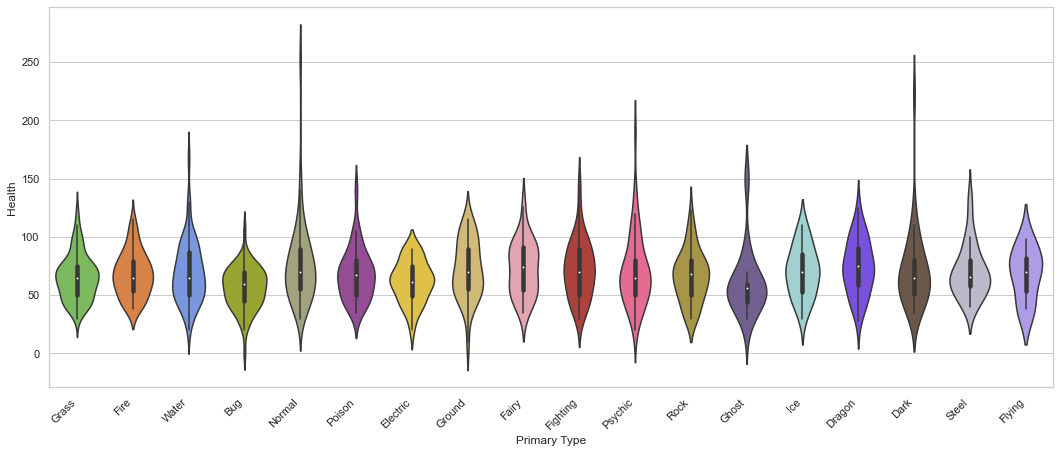

In [41]:
# Color Orient the types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                    '#705746',  # Dark
                    '#B7B7CE',  # Steel
                    '#A98FF3',  # Flying
                   ]

plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Health',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


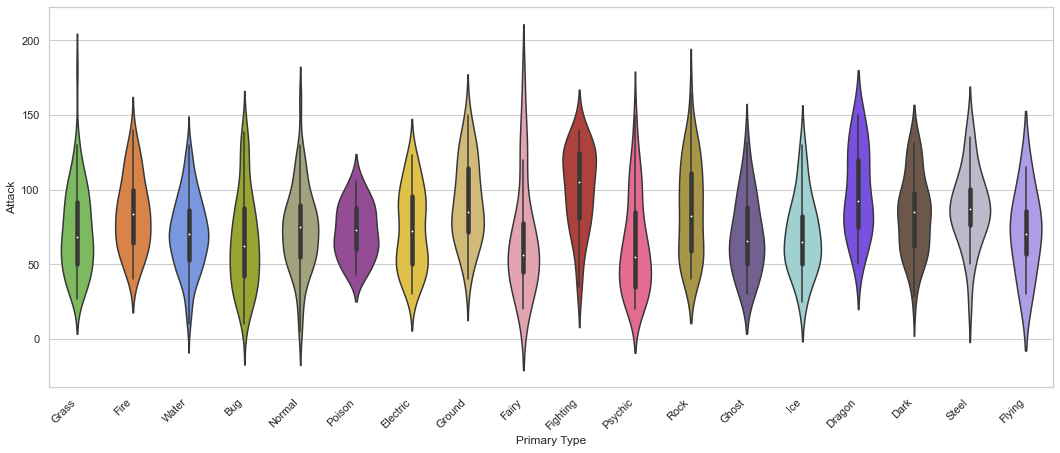

In [42]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Attack',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


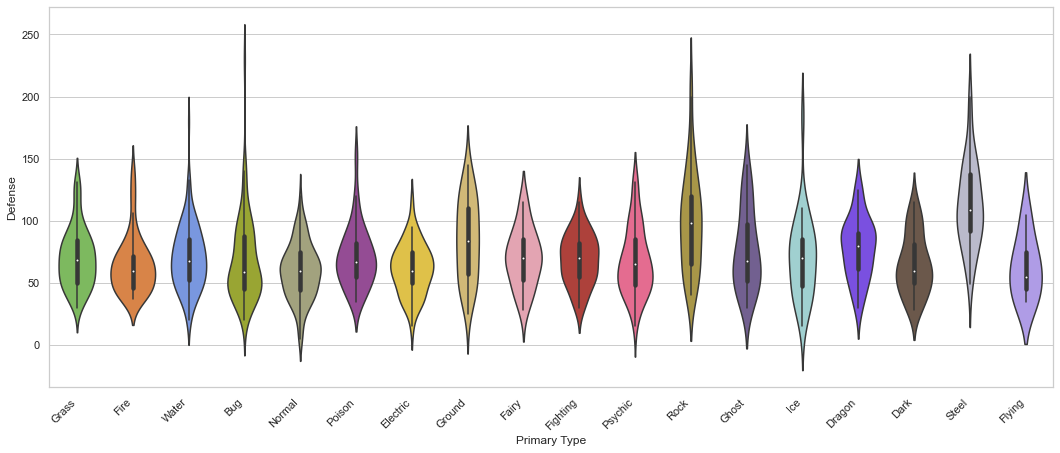

In [43]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Defense',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


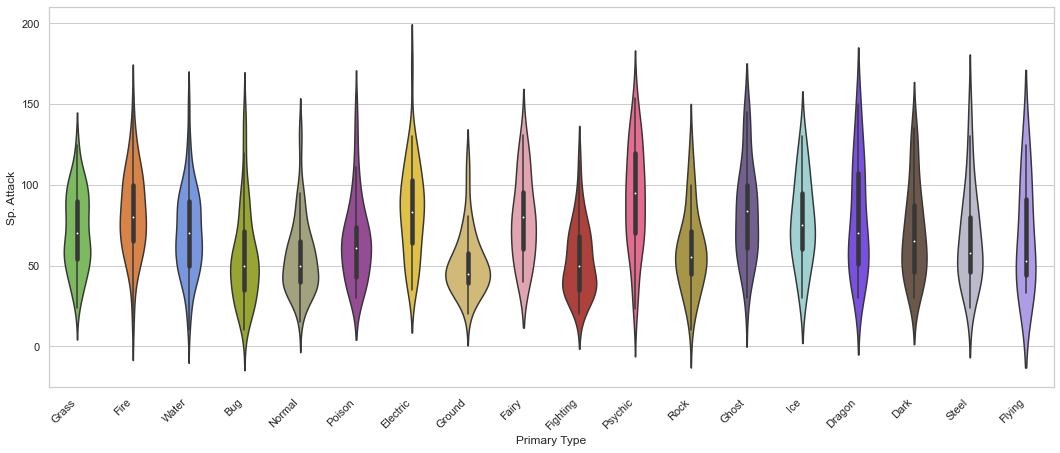

In [44]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Sp. Attack',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


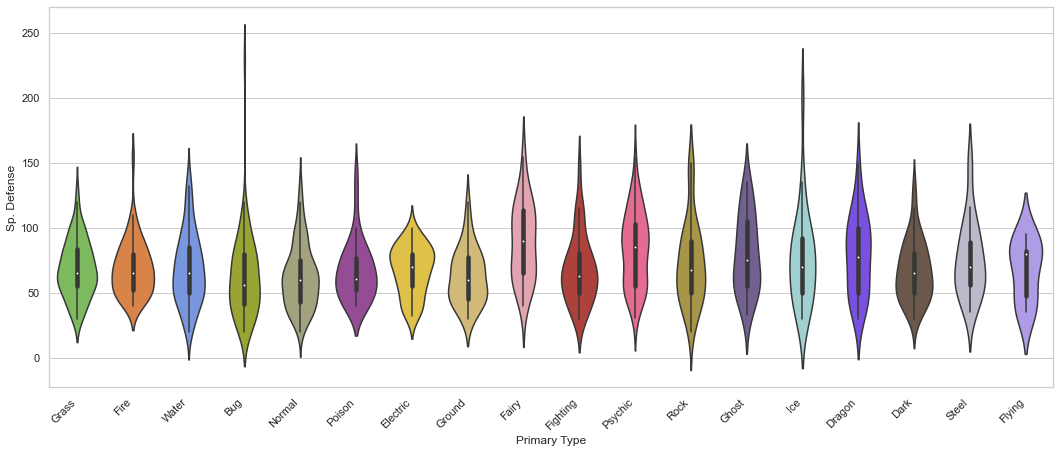

In [45]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Sp. Defense',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

[Text(0, 0, 'Grass'), Text(1, 0, 'Fire'), Text(2, 0, 'Water'), Text(3, 0, 'Bug'), Text(4, 0, 'Normal'), Text(5, 0, 'Poison'), Text(6, 0, 'Electric'), Text(7, 0, 'Ground'), Text(8, 0, 'Fairy'), Text(9, 0, 'Fighting'), Text(10, 0, 'Psychic'), Text(11, 0, 'Rock'), Text(12, 0, 'Ghost'), Text(13, 0, 'Ice'), Text(14, 0, 'Dragon'), Text(15, 0, 'Dark'), Text(16, 0, 'Steel'), Text(17, 0, 'Flying')]


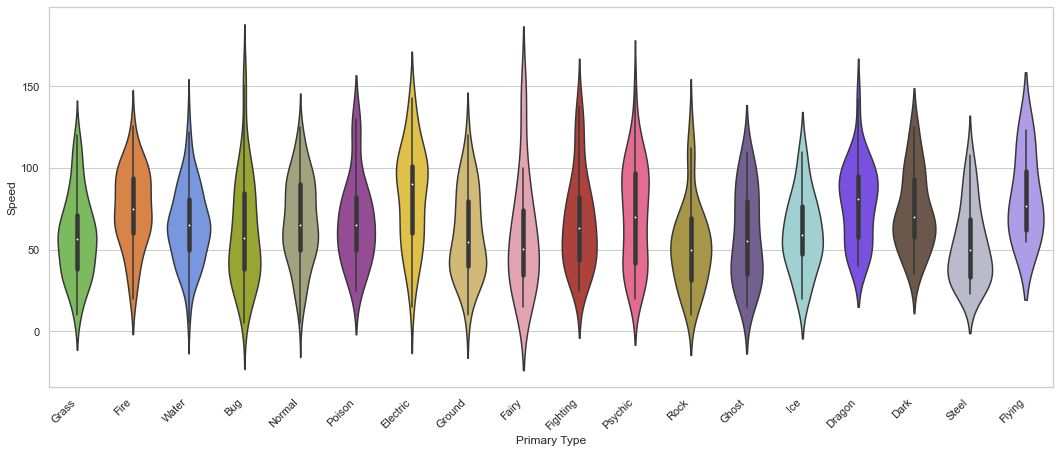

In [46]:
plt.figure(figsize=(18,7))
chart = sns.violinplot(x = 'Primary Type',
                       y = 'Speed',
                       data = cleaned_pokedex,
                       palette = pkmn_type_colors)
print(chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right'))

In [47]:
cleaned_pokedex.corr(method='pearson')

,Health,Attack,Defense,Sp. Attack,Sp. Defense,Speed,BST
Health,1.000000,0.462300,0.262520,0.375798,0.368130,0.182240,0.655868
Attack,0.462300,1.000000,0.452806,0.329287,0.218733,0.351200,0.719394
Defense,0.262520,0.452806,1.000000,0.199454,0.498902,-0.009012,0.614110
Sp. Attack,0.375798,0.329287,0.199454,1.000000,0.493582,0.424951,0.713955
Sp. Defense,0.368130,0.218733,0.498902,0.493582,1.000000,0.210856,0.701346
Speed,0.182240,0.351200,-0.009012,0.424951,0.210856,1.000000,0.547791
BST,0.655868,0.719394,0.614110,0.713955,0.701346,0.547791,1.000000


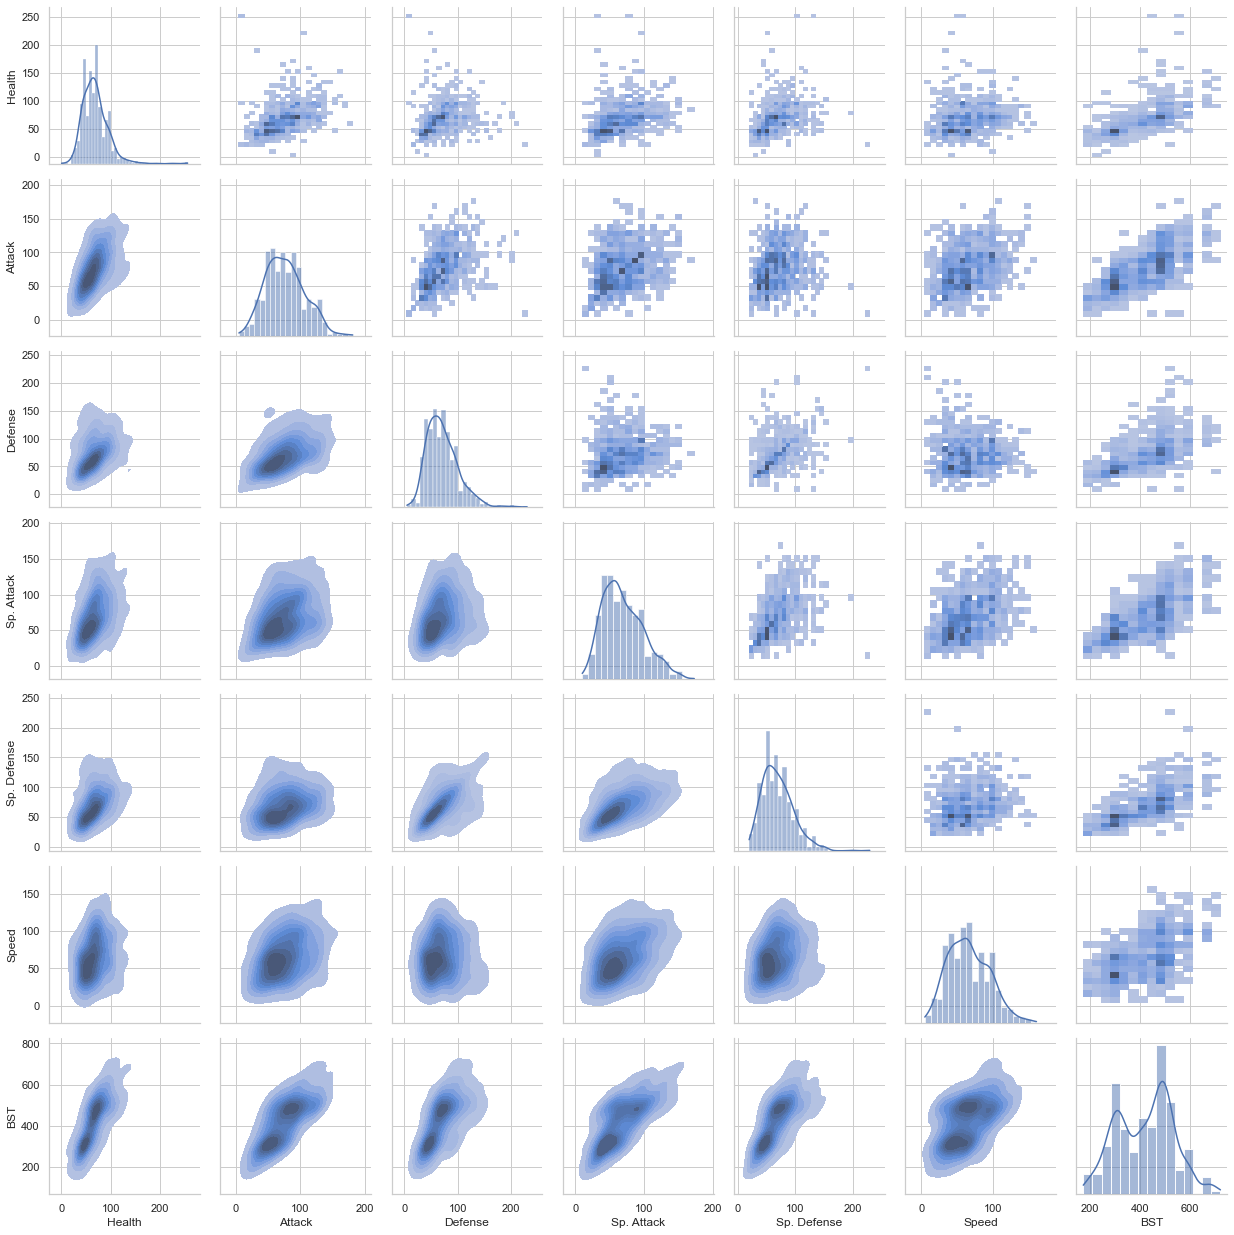

In [48]:
#sns.displot(cleaned_pokedex, x='Speed', hue='Primary Type', kind='kde', fill=True)
#sns.pairplot(cleaned_pokedex)
g = sns.PairGrid(cleaned_pokedex)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

<AxesSubplot:>

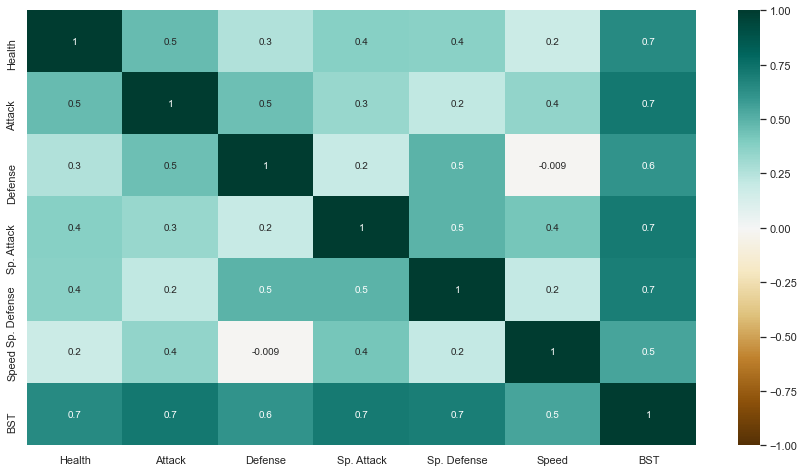

In [49]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sns.heatmap(cleaned_pokedex.corr(),annot = True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='BrBG')


In [50]:
'''
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

cleaned_pokedex['Primary_Type_Cat'] = labelencoder.fit_transform(cleaned_pokedex['Primary Type'])
print(cleaned_pokedex['Primary Type'].unique())
print(cleaned_pokedex['Primary_Type_Cat'].unique())
print('\n\n')
cleaned_pokedex['Secondary_Type_Cat'] = labelencoder.fit_transform(cleaned_pokedex['Secondary Type'])
print(cleaned_pokedex['Secondary Type'].unique())
print(cleaned_pokedex['Secondary_Type_Cat'].unique())
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\n# creating instance of labelencoder\nlabelencoder = LabelEncoder()\n\ncleaned_pokedex['Primary_Type_Cat'] = labelencoder.fit_transform(cleaned_pokedex['Primary Type'])\nprint(cleaned_pokedex['Primary Type'].unique())\nprint(cleaned_pokedex['Primary_Type_Cat'].unique())\nprint('\n\n')\ncleaned_pokedex['Secondary_Type_Cat'] = labelencoder.fit_transform(cleaned_pokedex['Secondary Type'])\nprint(cleaned_pokedex['Secondary Type'].unique())\nprint(cleaned_pokedex['Secondary_Type_Cat'].unique())\n"

In [51]:
from sklearn.model_selection import train_test_split


x = cleaned_pokedex[['Health',
                     'Defense',
                     'Sp. Attack',
                     'Sp. Defense',
                     'Speed']]

y = cleaned_pokedex[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.1)
    
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(713, 5)
(90, 5)
(713, 1)
(90, 1)


In [52]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

# Finding the coeffcients and the intercept value.
mlr.fit(x_train, y_train)


# Testing Pokemon Urshifu Base Stat 550
Urshifu = [[100,100,63,60,97]]
# kubfu = [[5,12,90,60,53]]
# zarude = [[16,9,120,105,70]]

#corviknight = [[16,7,98,87,53]]

# Testing  "Pokemon to see if the values match"

# takes values calculated by `.fit()` and the `x` values, 
#plugs them into the multiple linear regression equation, 
#and calculates the predicted y values.
y_predict = mlr.predict(Urshifu)

print(y_predict) 

# when comparing to the unreleased pokemon Urshifu his base stat is 550.
# Our prediction said 536.05 and accuracy of 97.46%

# when comparing to the unreleased pokemon Kubfu his base stat is 385.
# Our prediction said 401.33 and accuracy of 96.00%

# when comparing to the unreleased pokemon Zarude his base stat is 600.
# Our prediction said 544.62 and accuracy of 90.77%

[[115.1709826]]


In [53]:


# ATTACK 

type1_attack=pd.pivot_table(cleaned_pokedex, index = 'Primary Type', values = 'Attack')
type2_attack=pd.pivot_table(cleaned_pokedex, index = 'Secondary Type', values = 'Attack')


print("Attack",type1_attack)
print("Attack",type2_attack)

# DEFENSE 

type1_defense=pd.pivot_table(cleaned_pokedex, index = 'Primary Type', values = 'Defense')
type2_defense=pd.pivot_table(cleaned_pokedex, index = 'Secondary Type', values = 'Defense')

print("Defense",type1_defense)
print("Defense",type2_defense)

# Special DEFENSE 

type1_spdefense=pd.pivot_table(cleaned_pokedex, index = 'Primary Type', values = 'Sp. Defense')
type2_spdefense=pd.pivot_table(cleaned_pokedex, index = 'Secondary Type', values = 'Sp. Defense')

print("SP_Defense",type1_spdefense)
print("SP_Defense",type2_spdefense)

# Special ATTACK 

type1_spattack=pd.pivot_table(cleaned_pokedex, index = 'Primary Type', values = 'Sp. Attack')
type2_spattack=pd.pivot_table(cleaned_pokedex, index = 'Secondary Type', values = 'Sp. Attack')

print("SP_Defense",type1_spattack)
print("SP_Defense",type2_spattack)


# SPEED


type1_speed=pd.pivot_table(cleaned_pokedex, index = 'Primary Type', values = 'Speed')
type2_speed=pd.pivot_table(cleaned_pokedex, index = 'Secondary Type', values = 'Speed')

print("Speed",type1_speed)
print("Speed",type2_speed)



Attack                   Attack
Primary Type            
Bug            65.853333
Dark           83.342857
Dragon         98.766667
Electric       73.354167
Fairy          68.090909
Fighting      100.228571
Fire           83.741379
Flying         71.571429
Ghost          69.466667
Grass          72.767442
Ground         92.085714
Ice            69.666667
Normal         73.449541
Poison         72.171429
Psychic        63.245614
Rock           86.920000
Steel          88.566667
Water          71.032520
Attack                     Attack
Secondary Type            
 Bug             72.222222
 Dark            99.277778
 Dragon          86.480000
 Electric        73.500000
 Fairy           62.303030
 Fighting       101.960000
 Fire            68.307692
 Flying          75.810526
 Ghost           88.500000
 Grass           75.631579
 Ground          80.968750
 Ice             92.846154
 Normal          61.000000
 Poison          63.294118
 Psychic         69.218750
 Rock            86.066667
